In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras

df=pd.read_excel('../dataProcessing/outputOfJoinedTablexceptReleaseDate19862023.xlsx')

In [18]:
df.dropna(subset=['Genre_metacritic_game_info'], inplace=True)
df.drop('releasedate_link',axis='columns', inplace=True)
df.info ()
#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 21 to 8874
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   title                                826 non-null    object 
 1   platform                             826 non-null    object 
 2   genre                                826 non-null    object 
 3   publisher                            826 non-null    object 
 4   vg_score                             826 non-null    float64
 5   critic_score                         826 non-null    float64
 6   user_score                           826 non-null    float64
 7   total_shipped                        826 non-null    float64
 8   aisan_sales                          826 non-null    float64
 9   north_american_sales                 826 non-null    float64
 10  japan_sales                          826 non-null    float64
 11  european_sales                

Data pre-processing

In [19]:
df['years_since_release'] = 2023 - df['release_year']
df['avg_sales_since_release'] = df['global_sales'] / df['years_since_release']
df['Net_profit']=df['global_sales']-df['Production Cost']
df['Profit_Hit_Miss']=np.where(df['Net_profit'] >= 0, 'hit', 'miss')
#df.to_excel('new_df.xlsx', index=False)
df

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,...,Avg_Userscore_metacritic_game_info,No. of players_metacritic_game_info,releasedate_1986-2023,releasedate_VGOutput,releasedate_raw,releasedate_quarter,years_since_release,avg_sales_since_release,Net_profit,Profit_Hit_Miss
21,1701 A.D.,PC,Simulation,Sony Computer Entertainment,8.0,7.7,5.0,1.00,7.05,4.74,...,8.4,1 to 4,NaN,NaN,October 26 2006,2006-10-26 00:00:00,17,1.172941,12.98,hit
40,2002 FIFA World Cup,PC,Sports,Sony Computer Entertainment,2.0,6.0,7.0,277.00,3.77,3.55,...,8,Mutliplayer,NaN,NaN,2002-04-26 00:00:00,2002-04-26 00:00:00,21,0.568095,5.87,hit
42,2010 FIFA World Cup South Africa,PS3,Sports,Ubisoft,7.0,8.2,9.0,53.00,1.23,0.30,...,7.8,1,NaN,NaN,April 27 2010,2010-04-27 00:00:00,13,0.172308,-2.00,miss
114,ABZU,PC,Adventure,Activision,9.0,8.0,9.0,0.58,6.83,1.60,...,6.9,1,NaN,NaN,August 2 2016,2016-08-02 00:00:00,7,2.341429,12.64,hit
115,ABZU,PS4,Adventure,Electronic Arts,8.0,7.0,7.0,117.00,3.00,0.03,...,7.6,1,NaN,NaN,August 2 2016,2016-08-02 00:00:00,6,1.505000,5.79,hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,Zeno Clash,PC,Shooter,Activision,8.4,7.0,2.0,0.32,1.93,1.74,...,7.9,1,NaN,NaN,2009-04-21 00:00:00,2009-04-21 00:00:00,14,0.648571,5.06,hit
8851,Zero Escape Zero Time Dilemma,PC,Adventure,Activision,10.0,7.0,7.0,67.00,7.57,1.50,...,8.3,1,NaN,NaN,June 30 2016,2016-06-30 00:00:00,7,2.782857,17.99,hit
8852,Zero Escape Zero Time Dilemma,PS4,Adventure,Omega,10.0,10.0,10.0,133.00,3.00,0.02,...,7.2,1,NaN,NaN,August 17 2017,2017-08-17 00:00:00,6,0.946667,0.37,hit
8873,Zone of the Enders,PS2,Simulation,IBM,9.0,7.5,8.0,52.00,3.00,0.30,...,7.6,1 to 2,NaN,NaN,March 23 2001,2001-03-23 00:00:00,22,0.064545,1.38,hit


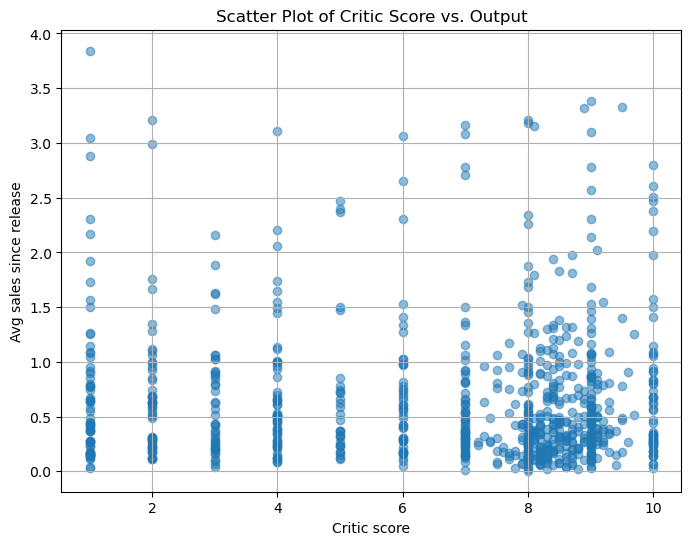

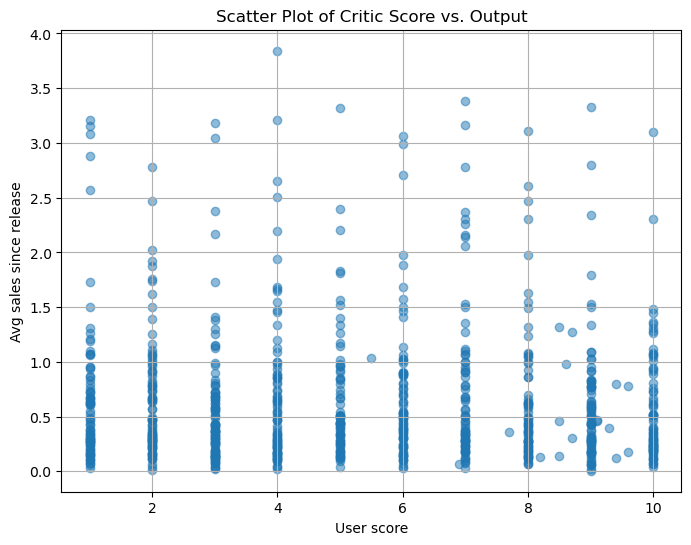

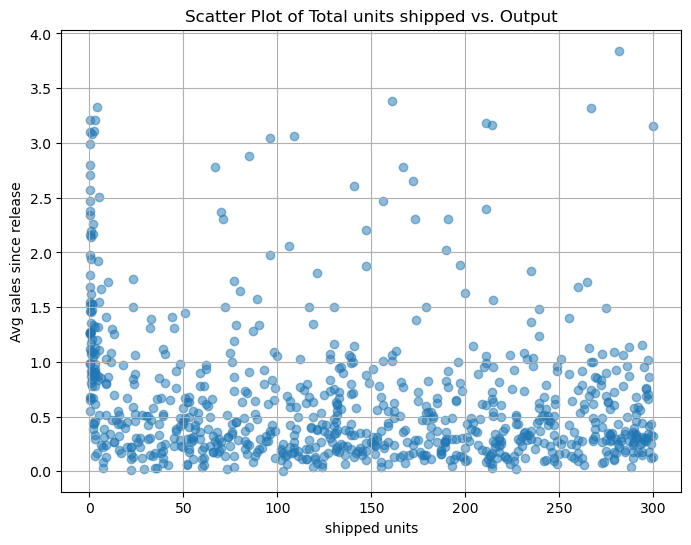

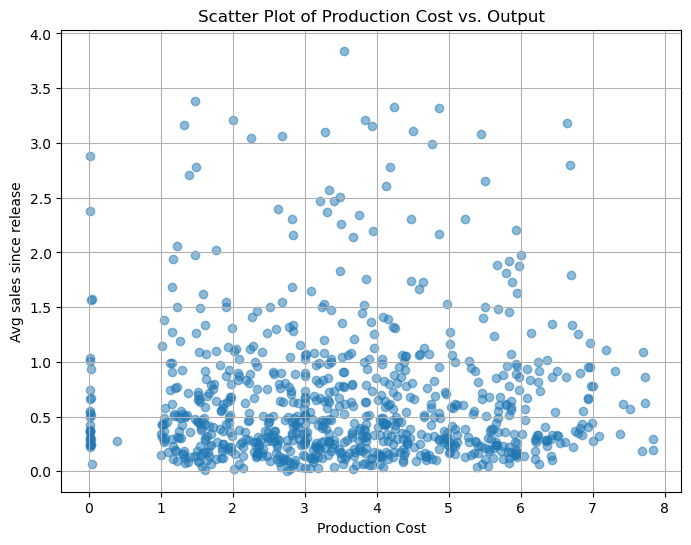

In [20]:
#Check linearity
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['critic_score'], df['avg_sales_since_release'], alpha=0.5)
plt.title(f"Scatter Plot of Critic Score vs. Output")
plt.xlabel("Critic score")
plt.ylabel("Avg sales since release")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['user_score'], df['avg_sales_since_release'], alpha=0.5)
plt.title(f"Scatter Plot of Critic Score vs. Output")
plt.xlabel("User score")
plt.ylabel("Avg sales since release")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['total_shipped'], df['avg_sales_since_release'], alpha=0.5)
plt.title(f"Scatter Plot of Total units shipped vs. Output")
plt.xlabel("shipped units")
plt.ylabel("Avg sales since release")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Production Cost'], df['avg_sales_since_release'], alpha=0.5)
plt.title(f"Scatter Plot of Production Cost vs. Output")
plt.xlabel("Production Cost")
plt.ylabel("Avg sales since release")
plt.grid(True)
plt.show()

In [21]:
#Check on Nulticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
check = ['critic_score', 'user_score', 'Production Cost','avg_sales_since_release','global_sales']
df_check=df[check]

X = df_check.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,critic_score,4.155070
1,user_score,3.599052
2,Production Cost,3.835441
3,avg_sales_since_release,1.900009


In [22]:
#Encoding 
encoder = OneHotEncoder(sparse=False)

#Genre
genre_encoded = pd.get_dummies(df['genre'], prefix='genre', drop_first=True)
#data.drop('genre', axis=1, inplace=True) 

#Platform
platform_encoded = pd.get_dummies(df['platform'], prefix='platform', drop_first=True)

#Publisher
publisher_encoded = pd.get_dummies(df['publisher'], prefix='publisher', drop_first=True)

#Players
Players_encoded = pd.get_dummies(df['No. of players_metacritic_game_info'], prefix='Players', drop_first=True)

In [23]:
data = pd.concat([df, genre_encoded, publisher_encoded,publisher_encoded,Players_encoded], axis=1)
data.to_excel('test_onehot1.xlsx', index=False)

In [24]:
features = ['critic_score', 'user_score', 'Production Cost']

# Input variables redefine
X = pd.concat([genre_encoded, df[features]], axis=1)
y = data['avg_sales_since_release']

X

,genre_Board Game,genre_Fighting,genre_Puzzle,genre_Racing,genre_Shooter,genre_Simulation,genre_Sports,critic_score,user_score,Production Cost
21,0,0,0,0,0,1,0,7.7,5.0,6.96
40,0,0,0,0,0,0,1,6.0,7.0,6.06
42,0,0,0,0,0,0,1,8.2,9.0,4.24
114,0,0,0,0,0,0,0,8.0,9.0,3.75
115,0,0,0,0,0,0,0,7.0,7.0,3.24
...,...,...,...,...,...,...,...,...,...,...
8847,0,0,0,0,1,0,0,7.0,2.0,4.02
8851,0,0,0,0,0,0,0,7.0,7.0,1.49
8852,0,0,0,0,0,0,0,10.0,10.0,5.31
8873,0,0,0,0,0,1,0,7.5,8.0,0.04


In [32]:
#Data splitting
# Split into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle=True)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 660 samples
Testing set: 166 samples


Model implementation

In [33]:
#LM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x1_train, x1_test, y_train, y_test = train_test_split(data[features], y, test_size=0.2, random_state=50, shuffle=True)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x1_train, y_train)
lr_predictions = lr_model.predict(x1_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Mean Squared Error (MSE): {lr_mse}")
print(f"Linear Regression Mean Absolute Error (MAE): {lr_mae}")
print(f"Linear Regression Root-mean-square deviation (RMSE): {lr_rmse}")
print(f"Linear Regression R-squared (R2): {lr_r2}")

Linear Regression Mean Squared Error (MSE): 0.44047707603255715
Linear Regression Mean Absolute Error (MAE): 0.45532190362335334
Linear Regression Root-mean-square deviation (RMSE): 0.6636844702360882
Linear Regression R-squared (R2): -0.020609402705795254


In [37]:
coefficients = lr_model.coef_

print(coefficients)

[-0.01516765 -0.01000281  0.0027247 ]


In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def svr_model(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    model = SVR(kernel='rbf', C=1.0)
    model.fit(X_train_scaled, y_train)
    return model


def evaluate_svr_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

# Use the evaluation function with your test data
trained_svr_model = svr_model(X_train, y_train)  # Train the model first
evaluate_svr_model(trained_svr_model, X_test, y_test)

Mean Absolute Error: 0.44
Mean Squared Error: 0.44
R-squared: -0.01


d:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [41]:
# Neural Network
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  # Linear output for regression
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics = "accuracy")
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

nn_predictions = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)

print(f"Neural Network Mean Squared Error (MSE): {nn_mse}")
print(f"Neural Network Mean Absolute Error (MAE): {nn_mae}")

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 5.8417 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 997us/step - loss: 0.6119 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 997us/step - loss: 0.5170 - accuracy: 0.0015
Epoch 4/100
7/7 [==============================] - 0s 832us/step - loss: 0.4792 - accuracy: 0.0015
Epoch 5/100
7/7 [==============================] - 0s 831us/step - loss: 0.4588 - accuracy: 0.0015
Epoch 6/100
7/7 [==============================] - 0s 831us/step - loss: 0.4450 - accuracy: 0.0015
Epoch 7/100
7/7 [==============================] - 0s 997us/step - loss: 0.4339 - accuracy: 0.0015
Epoch 8/100
7/7 [==============================] - 0s 831us/step - loss: 0.4263 - accuracy: 0.0015
Epoch 9/100
7/7 [==============================] - 0s 997us/step - loss: 0.4205 - accuracy: 0.0015
Epoch 10/100
7/7 [==============================] - 0s 831us/step - loss: 0.4157 - accuracy: 0.0015
Epo

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest R-squared (R2): {rf_r2}")

Random Forest Mean Squared Error (MSE): 0.47654542136644834
Random Forest Mean Absolute Error (MAE): 0.4958647222120362
Random Forest R-squared (R2): -0.10418172551400451


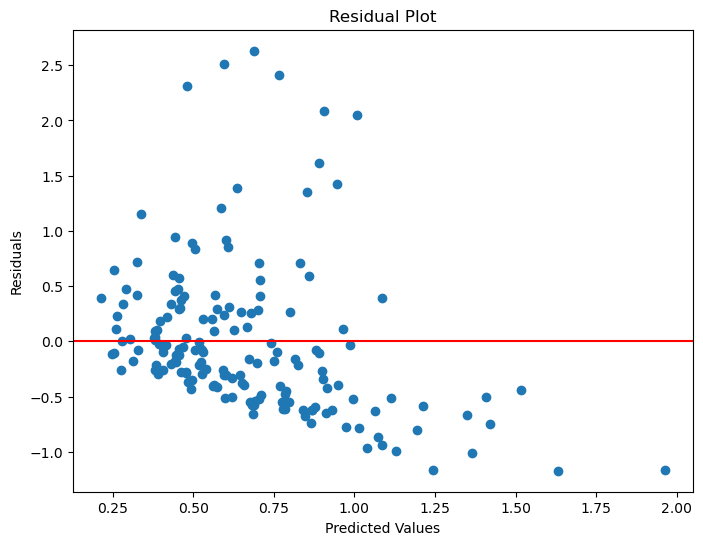

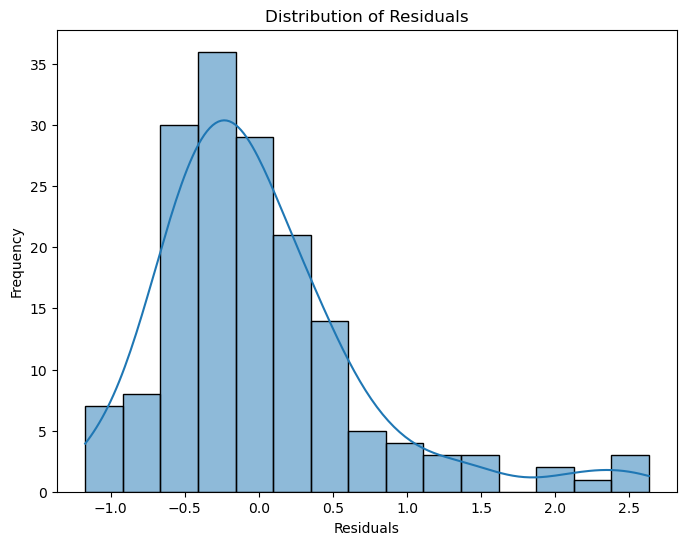

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Residual plot
residuals = y_test - rf_predictions
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


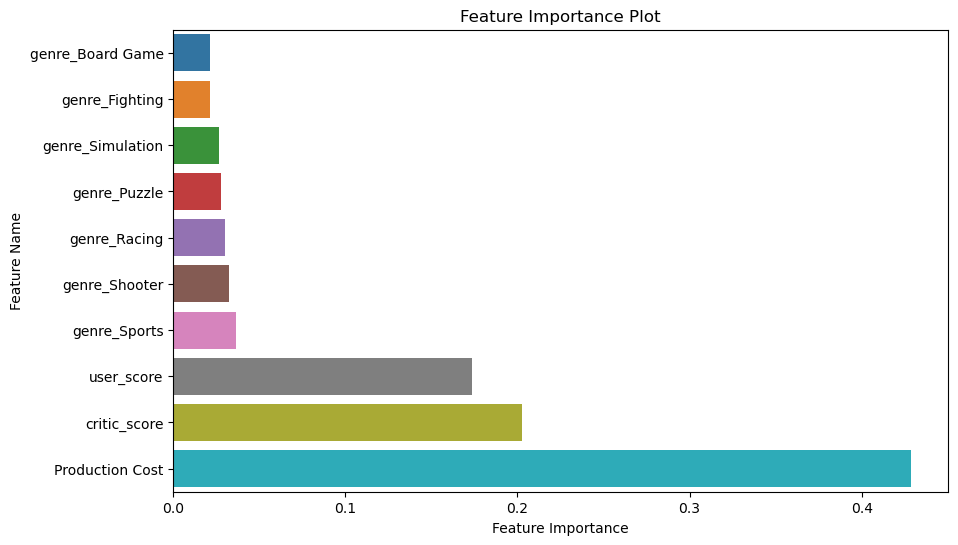

In [46]:
if hasattr(rf_model, 'feature_importances_'):
    feature_importances = rf_model.feature_importances_
    feature_names = X.columns  # Replace X with your feature data
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Feature Importance Plot")
    plt.show()

In [45]:
#feature_importances for RF
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
9   Production Cost    0.428870
7      critic_score    0.202870
8        user_score    0.173417
6      genre_Sports    0.036251
4     genre_Shooter    0.032506
3      genre_Racing    0.029850
2      genre_Puzzle    0.027689
5  genre_Simulation    0.026284
1    genre_Fighting    0.021163
0  genre_Board Game    0.021100


Classification: Profit/Loss prediction

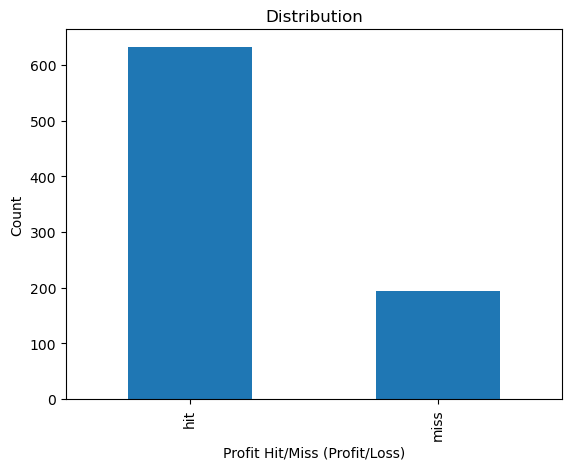

In [77]:
class_distribution = data['Profit_Hit_Miss'].value_counts()

class_distribution.plot(kind='bar')
plt.xlabel('Profit Hit/Miss (Profit/Loss)')
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

#Imbalanced dataset

In [48]:
features = ['critic_score', 'user_score', 'Production Cost']

# Input variables redefine
X = pd.concat([genre_encoded,publisher_encoded,platform_encoded, df[features]], axis=1)
y = data['Profit_Hit_Miss']

#Data splitting
# Split into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle=True)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 660 samples
Testing set: 166 samples


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.7771084337349398

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

y_test_binary = np.where(y_test == 'hit', 1, 0)

accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
roc_auc = roc_auc_score(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
precision, recall, _ = precision_recall_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])



print("Random Forest:")
print(f"Accuracy: ", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC_AUC:",roc_auc)


Random Forest:
Accuracy:  0.7771084337349398
Confusion Matrix:
[[117  12]
 [ 25  12]]
ROC_AUC: 0.18751309448983866


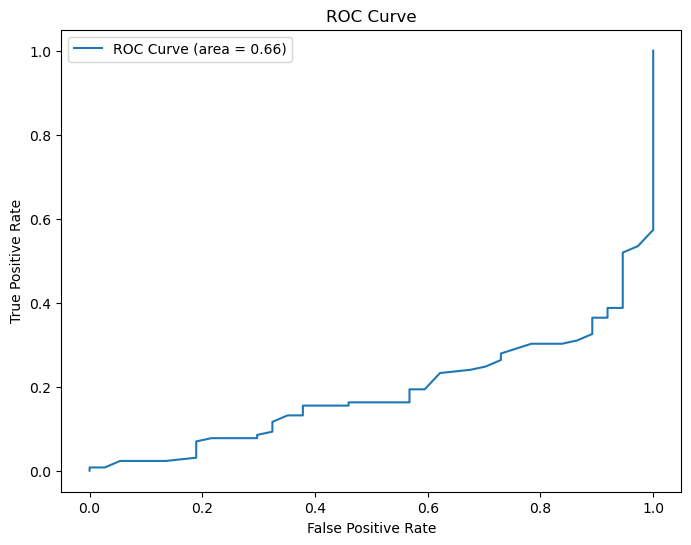

In [114]:
fpr, tpr, _ = roc_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (area = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

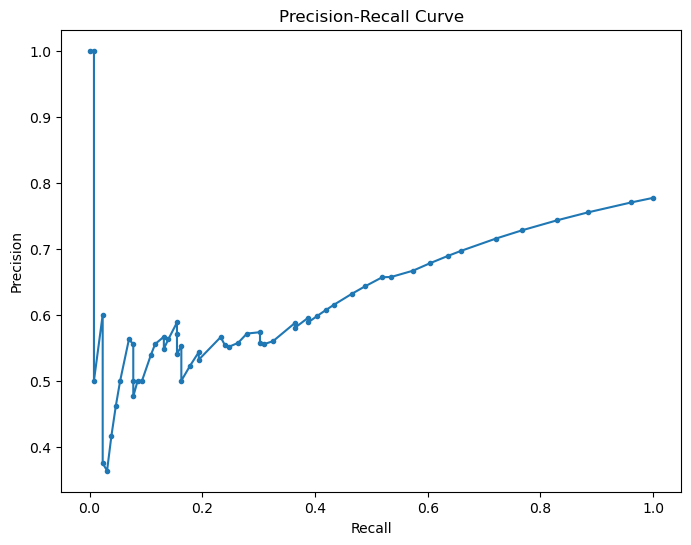

In [72]:

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [91]:
# Neural Network for Binary Classification
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

nn_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, (y_train == 'hit').astype(int), epochs=100, batch_size=32, verbose=0)

nn_predictions = nn_model.predict(X_test)
nn_predictions = (nn_predictions > 0.5)  

nn_accuracy = accuracy_score((y_test == 'hit').astype(int), nn_predictions)
nn_accuracy

6/6 [==============================] - 0s 797us/step


0.8012048192771084

NN:
Accuracy: 0.80
Confusion Matrix:
[[ 15  22]
 [ 11 118]]
ROC AUC:  0.6600670437879739


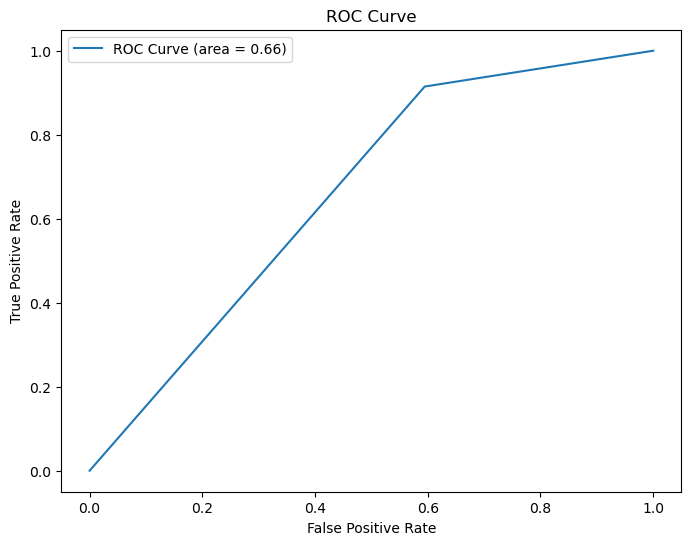

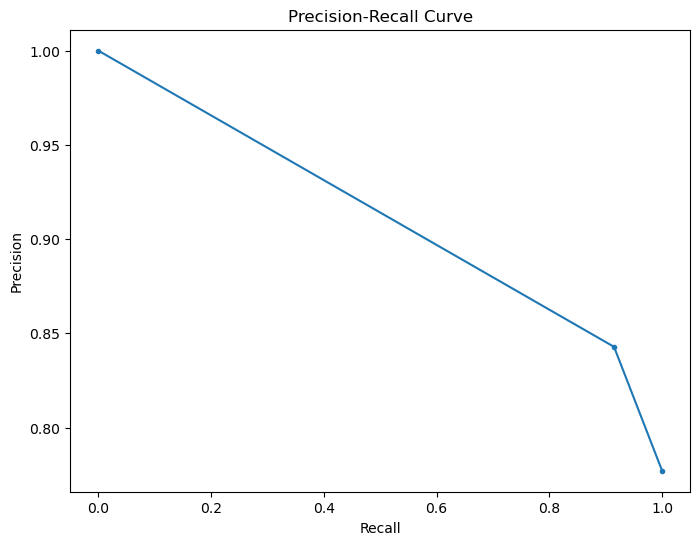

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

y_test_binary = (y_test == 'hit').astype(int)  # Convert 'hit' to 1 and 'miss' to 0

accuracy = accuracy_score(y_test_binary, (nn_predictions > 0.5))
conf_matrix = confusion_matrix(y_test_binary, (nn_predictions > 0.5))
roc_auc = roc_auc_score(y_test_binary, nn_predictions)
precision, recall, _ = precision_recall_curve(y_test_binary, nn_predictions)

print("NN:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC: ",roc_auc)

# Create ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, nn_predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (area = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Create Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [116]:
#lR
from sklearn.linear_model import LogisticRegression

y_logreg = y_train.map({'hit': 1, 'miss': 0})

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_logreg)

logreg_predictions = logistic_regression.predict(X_test)


In [120]:
accuracy = accuracy_score(y_test.map({'hit': 1, 'miss': 0}), logreg_predictions)
conf_matrix = confusion_matrix(y_test.map({'hit': 1, 'miss': 0}), logreg_predictions)

# Calculate ROC AUC
logreg_probabilities = logistic_regression.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test.map({'hit': 1, 'miss': 0}), logreg_probabilities)

print("Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC:", lrroc_auc)

Logistic Regression:
Accuracy: 0.81
Confusion Matrix:
[[ 15  22]
 [ 10 119]]
ROC AUC: 0.837628326000419


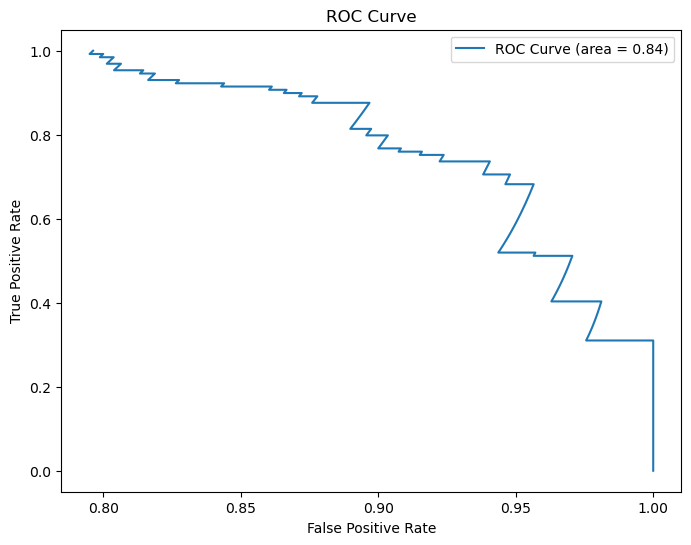

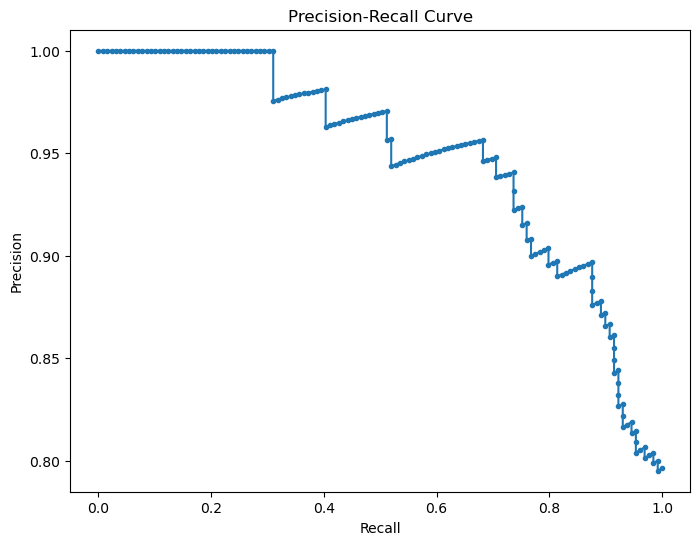

In [122]:
fpr, tpr, _ = precision_recall_curve(y_test.map({'hit': 1, 'miss': 0}), logreg_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (area = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

precision, recall, _ = precision_recall_curve(y_test.map({'hit': 1, 'miss': 0}), logreg_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Dataset with Text Analytics output

In [3]:
df_txt=pd.read_csv('../Modelling/Text Analytics/userCommentsSales.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\177289365.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_txt=pd.read_csv('../Modelling/Text Analytics/userCommentsSales.csv')


In [7]:
#Check on Nulticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
check = ['critic_score', 'Avg_Userscore_metacritic_game_info', 'Production Cost']
df_txt_ck=df[check]

X = df_txt_ck.iloc[:,:-1]
calc_vif(X)

TypeError: '>=' not supported between instances of 'float' and 'str'